# cheking the comparison betwen biomass under two conditions
 # A with glucose and oxyen alone and 
 # B all nutrients allowed

In [1]:

import cobra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = cobra.io.read_sbml_model("../model/Mouse-GEM.xml")

https://identifiers.org/taxonomy/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id


In [3]:
# --- Condition 1: Glucose + oxygen only ---
glucose_only_model = model.copy()

# Close all uptake reactions
for rxn in glucose_only_model.exchanges:
    rxn.lower_bound = 0

# Allow only glucose and oxygen uptake
glucose_only_model.reactions.get_by_id("MAR01947").lower_bound = -10  # glucose-1-phosphate
glucose_only_model.reactions.get_by_id("MAR09048").lower_bound = -20  # oxygen

sol_glucose_only = glucose_only_model.optimize()
growth_glucose_only = sol_glucose_only.objective_value


In [4]:
# --- Condition 2: Rich medium (default) ---
rich_model = model.copy()
sol_rich = rich_model.optimize()
growth_rich = sol_rich.objective_value


In [5]:
#Creating a dataframe to compare growth rates
import pandas as pd

growth_df = pd.DataFrame({
    "Condition": ["Glucose + O2 only", "Rich medium (all nutrients)"],
    "Biomass growth rate": [growth_glucose_only, growth_rich]
})

growth_df


,Condition,Biomass growth rate
0,Glucose + O2 only,0.000000
1,Rich medium (all nutrients),4.262828


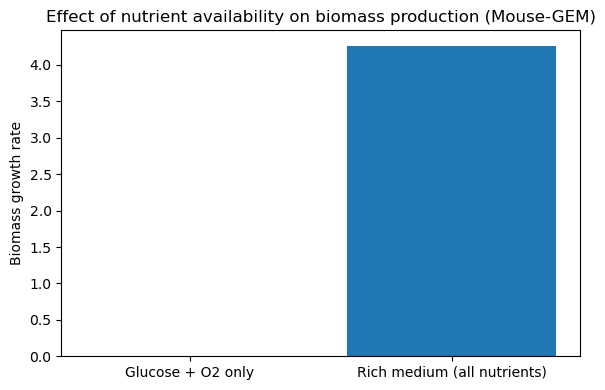

In [6]:
#Ploting the comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(growth_df["Condition"], growth_df["Biomass growth rate"])
plt.ylabel("Biomass growth rate")
plt.title("Effect of nutrient availability on biomass production (Mouse-GEM)")
plt.tight_layout()
plt.show()
